### DAY6.1 전일자 예습

In [1]:
import pandas as pd

In [2]:
#data 읽어오기
data = pd.read_excel('./data/부산탄소발생현황.xlsx')

In [3]:
data.head()

,연도,용도명,구명,동명,배출량원단위(전기),배출량원단위(가스),배출량원단위(지역난방)
0,2013,공동주택,사하구,괴정동,3.782,0.000,0.0
1,2013,-,연제구,연산동,0.200,0.000,0.0
2,2013,단독주택,부산진구,전포동,15.977,0.000,0.0
3,2013,단독주택,사하구,하단동,0.000,3.512,0.0
4,2013,단독주택,부산진구,부암동,0.000,5.569,0.0


In [4]:
data.tail()

,연도,용도명,구명,동명,배출량원단위(전기),배출량원단위(가스),배출량원단위(지역난방)
4995,2011,제1종근린생활시설,남구,대연동,0.000,131.588,0.0
4996,2011,제1종근린생활시설,중구,신창동2가,0.000,0.000,0.0
4997,2011,단독주택,북구,덕천동,4.808,0.000,0.0
4998,2011,단독주택,남구,문현동,3.052,0.000,0.0
4999,2011,단독주택,금정구,오륜동,4.843,0.000,0.0


In [5]:
data.index

RangeIndex(start=0, stop=5000, step=1)

In [6]:
data.columns

Index(['연도', '용도명', '구명', '동명', '배출량원단위(전기)', '배출량원단위(가스)', '배출량원단위(지역난방)'], dtype='object')

In [8]:
#컬럼 이름 변경 : rename으로 딕셔너리 형태로 변경 key(변경전) : value(변경후)
#rename 은 columns뿐 아니라 index도 변경가능함 
data=data.rename(columns = {'배출량원단위(전기)':'전기',
                            '배출량원단위(가스)':'가스',
                            '배출량원단위(지역난방)':'지역난방'
                           })
data.head()

,연도,용도명,구명,동명,전기,가스,지역난방
0,2013,공동주택,사하구,괴정동,3.782,0.000,0.0
1,2013,-,연제구,연산동,0.200,0.000,0.0
2,2013,단독주택,부산진구,전포동,15.977,0.000,0.0
3,2013,단독주택,사하구,하단동,0.000,3.512,0.0
4,2013,단독주택,부산진구,부암동,0.000,5.569,0.0


In [10]:
#컬럼 이름 심플하게 변경 
data.columns = ['연도', '용도명', '구명', '동명', '전기', '가스', '지역난방']
data.columns

Index(['연도', '용도명', '구명', '동명', '전기', '가스', '지역난방'], dtype='object')

In [12]:
data.head()

,연도,용도명,구명,동명,전기,가스,지역난방
0,2013,공동주택,사하구,괴정동,3.782,0.000,0.0
1,2013,-,연제구,연산동,0.200,0.000,0.0
2,2013,단독주택,부산진구,전포동,15.977,0.000,0.0
3,2013,단독주택,사하구,하단동,0.000,3.512,0.0
4,2013,단독주택,부산진구,부암동,0.000,5.569,0.0


In [14]:
#년도별 자료 : 그룹대상은 (), 보는 항목은 []  보고싶은 데이터 함수 mean, sum
df_year = data.groupby('연도')[['전기','가스','지역난방']].mean()
df_year

,전기,가스,지역난방
연도,,,
2011,4.498492,10.720585,1.040511
2013,7.166059,9.215794,3.106059


In [17]:
#시각화 
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


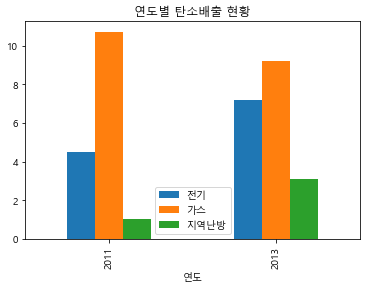

In [19]:
#bar graph 변경 
df_year.plot(kind='bar')
plt.title('연도별 탄소배출 현황')
plt.show()

In [20]:
#용도별 자료 : 그룹대상은 (), 보는 항목은 []  보고싶은 데이터 함수 mean, sum
df_gubun = data.groupby('용도명')[['전기','가스','지역난방']].mean()
df_gubun

,전기,가스,지역난방
용도명,,,
-,26.011910,0.000000,0.000000
공동주택,2.719017,13.899399,11.445691
교육연구및복지시설,3.930000,0.397000,0.000000
교육연구시설,4.124645,25.627935,11.017871
근린생활시설,3.884400,3.413000,0.000000
노유자시설,3.013690,14.833897,9.335276
단독주택,3.048776,1.535053,0.271463
문화및집회시설,26.462500,0.393333,0.000000
방송통신시설,0.000000,0.000000,1.164000


In [21]:
df_gubun.index

Index(['-', '공동주택', '교육연구및복지시설', '교육연구시설', '근린생활시설', '노유자시설', '단독주택',
       '문화및집회시설', '방송통신시설', '숙박시설', '업무시설', '운동시설', '운수시설', '위락시설',
       '위험물저장및처리시설', '의료시설', '자동차관련시설', '제1종근린생활시설', '제2종근린생활시설', '종교시설',
       '창고시설', '판매시설'],
      dtype='object', name='용도명')

In [22]:
#index rename 
df_gubun=df_gubun.rename(index={'-':'기타'})
df_gubun.index

Index(['기타', '공동주택', '교육연구및복지시설', '교육연구시설', '근린생활시설', '노유자시설', '단독주택',
       '문화및집회시설', '방송통신시설', '숙박시설', '업무시설', '운동시설', '운수시설', '위락시설',
       '위험물저장및처리시설', '의료시설', '자동차관련시설', '제1종근린생활시설', '제2종근린생활시설', '종교시설',
       '창고시설', '판매시설'],
      dtype='object', name='용도명')

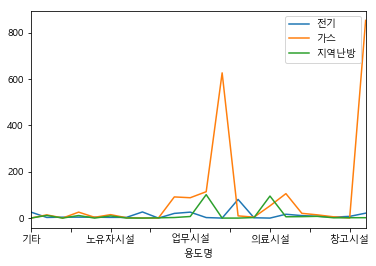

In [24]:
df_gubun.plot()
plt.show()

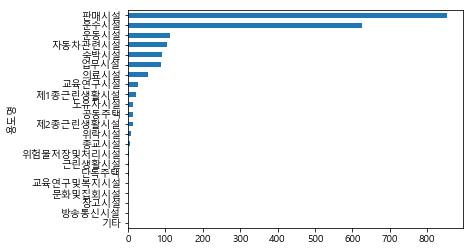

In [25]:
#가스 사용량이 많은 용도 기준 소트후  bar그래프로 바로 표시 
df_gubun['가스'].sort_values().plot(kind='barh')
plt.show()

In [26]:
data.head()

,연도,용도명,구명,동명,전기,가스,지역난방
0,2013,공동주택,사하구,괴정동,3.782,0.000,0.0
1,2013,-,연제구,연산동,0.200,0.000,0.0
2,2013,단독주택,부산진구,전포동,15.977,0.000,0.0
3,2013,단독주택,사하구,하단동,0.000,3.512,0.0
4,2013,단독주택,부산진구,부암동,0.000,5.569,0.0


In [28]:
#
df= data.groupby('구명')[['전기','가스','지역난방']].mean()
df

,전기,가스,지역난방
구명,,,
강서구,1.637256,2.558892,9.093517
금정구,5.738754,5.152858,1.908517
기장군,2.046715,6.983860,1.741740
남구,3.382481,2.370365,1.494403
동구,13.437295,1.806143,0.552283
동래구,7.537049,3.725948,3.129478
부산진구,7.405469,17.551699,1.603519
북구,8.738386,17.966486,3.697347
사상구,6.423692,23.486733,1.280364


In [29]:
#인덱스 초기화 reset_index()
df = df.reset_index()

In [30]:
df

,구명,전기,가스,지역난방
0,강서구,1.637256,2.558892,9.093517
1,금정구,5.738754,5.152858,1.908517
2,기장군,2.046715,6.983860,1.741740
3,남구,3.382481,2.370365,1.494403
4,동구,13.437295,1.806143,0.552283
5,동래구,7.537049,3.725948,3.129478
6,부산진구,7.405469,17.551699,1.603519
7,북구,8.738386,17.966486,3.697347
8,사상구,6.423692,23.486733,1.280364
9,사하구,4.348179,3.029733,2.605370


In [32]:
list(df['구명'])

['강서구',
 '금정구',
 '기장군',
 '남구',
 '동구',
 '동래구',
 '부산진구',
 '북구',
 '사상구',
 '사하구',
 '서구',
 '수영구',
 '연제구',
 '영도구',
 '중구',
 '해운대구']

In [34]:
df['구명'].tolist()

['강서구',
 '금정구',
 '기장군',
 '남구',
 '동구',
 '동래구',
 '부산진구',
 '북구',
 '사상구',
 '사하구',
 '서구',
 '수영구',
 '연제구',
 '영도구',
 '중구',
 '해운대구']

In [63]:
df_area = pd.read_excel('./data/부산구청.xlsx')
df_area

,항목,위도,경도
0,중구,35.106609,129.030064
1,서구,35.097924,129.022010
2,동구,35.129344,129.043314
3,영도구,35.091212,129.065700
4,부산진구,35.163087,129.051213
5,동래구,35.204841,129.081425
6,남구,35.136578,129.082053
7,북구,35.198325,128.987705
8,해운대구,35.163106,129.161390
9,사하구,35.104451,128.972650


In [53]:
#컬럼명을 merge를 위해 변경 
df_area=df_area.rename(columns = {'항목':'구명'})
df_area

,구명,위도,경도
0,중구,35.106609,129.030064
1,서구,35.097924,129.022010
2,동구,35.129344,129.043314
3,영도구,35.091212,129.065700
4,부산진구,35.163087,129.051213
5,동래구,35.204841,129.081425
6,남구,35.136578,129.082053
7,북구,35.198325,128.987705
8,해운대구,35.163106,129.161390
9,사하구,35.104451,128.972650


In [54]:
df.head()

,구명,전기,가스,지역난방
0,강서구,1.637256,2.558892,9.093517
1,금정구,5.738754,5.152858,1.908517
2,기장군,2.046715,6.983860,1.741740
3,남구,3.382481,2.370365,1.494403
4,동구,13.437295,1.806143,0.552283


In [55]:
len(df)

16

In [56]:
len(df_area)

16

In [57]:
df1 = pd.concat([df,df_area])
df1.head()

C:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,가스,경도,구명,위도,전기,지역난방
0,2.558892,NaN,강서구,NaN,1.637256,9.093517
1,5.152858,NaN,금정구,NaN,5.738754,1.908517
2,6.983860,NaN,기장군,NaN,2.046715,1.741740
3,2.370365,NaN,남구,NaN,3.382481,1.494403
4,1.806143,NaN,동구,NaN,13.437295,0.552283


In [58]:
df= df.sort_values('구명')
df_area= df_area.sort_values('구명')

In [59]:
df

,구명,전기,가스,지역난방
0,강서구,1.637256,2.558892,9.093517
1,금정구,5.738754,5.152858,1.908517
2,기장군,2.046715,6.983860,1.741740
3,남구,3.382481,2.370365,1.494403
4,동구,13.437295,1.806143,0.552283
5,동래구,7.537049,3.725948,3.129478
6,부산진구,7.405469,17.551699,1.603519
7,북구,8.738386,17.966486,3.697347
8,사상구,6.423692,23.486733,1.280364
9,사하구,4.348179,3.029733,2.605370


In [60]:
df_area=df_area.reset_index()
df_area

,index,구명,위도,경도
0,11,강서구,35.212231,128.978379
1,10,금정구,35.242974,129.089958
2,15,기장군,35.244600,129.220059
3,6,남구,35.136578,129.082053
4,2,동구,35.129344,129.043314
5,5,동래구,35.204841,129.081425
6,4,부산진구,35.163087,129.051213
7,7,북구,35.198325,128.987705
8,14,사상구,35.152640,128.988623
9,9,사하구,35.104451,128.972650


In [61]:
df1 = pd.concat([df,df_area],axis =1, join='inner')
df1

,구명,전기,가스,지역난방,index,구명,위도,경도
0,강서구,1.637256,2.558892,9.093517,11,강서구,35.212231,128.978379
1,금정구,5.738754,5.152858,1.908517,10,금정구,35.242974,129.089958
2,기장군,2.046715,6.983860,1.741740,15,기장군,35.244600,129.220059
3,남구,3.382481,2.370365,1.494403,6,남구,35.136578,129.082053
4,동구,13.437295,1.806143,0.552283,2,동구,35.129344,129.043314
5,동래구,7.537049,3.725948,3.129478,5,동래구,35.204841,129.081425
6,부산진구,7.405469,17.551699,1.603519,4,부산진구,35.163087,129.051213
7,북구,8.738386,17.966486,3.697347,7,북구,35.198325,128.987705
8,사상구,6.423692,23.486733,1.280364,14,사상구,35.152640,128.988623
9,사하구,4.348179,3.029733,2.605370,9,사하구,35.104451,128.972650


In [68]:
df_area=df_area.rename(columns = {'항목':'구명'})

In [70]:
#구명 기준으로 데이터 merge하기
df_area
df2= pd.merge(df,df_area, on='구명',how='inner')


In [71]:
df2

,구명,전기,가스,지역난방,위도,경도
0,강서구,1.637256,2.558892,9.093517,35.212231,128.978379
1,금정구,5.738754,5.152858,1.908517,35.242974,129.089958
2,기장군,2.046715,6.983860,1.741740,35.244600,129.220059
3,남구,3.382481,2.370365,1.494403,35.136578,129.082053
4,동구,13.437295,1.806143,0.552283,35.129344,129.043314
5,동래구,7.537049,3.725948,3.129478,35.204841,129.081425
6,북구,8.738386,17.966486,3.697347,35.198325,128.987705
7,사상구,6.423692,23.486733,1.280364,35.152640,128.988623
8,사하구,4.348179,3.029733,2.605370,35.104451,128.972650
9,서구,3.663406,16.548430,2.087043,35.097924,129.022010


### forium 지도 시각화

In [93]:
import folium
map_osm = folium.Map(location=[35.166804,129.083479], zoom_start=12)   # 지도 초기 로딩위치

In [94]:
for item in df2.index:
    lat = df2.loc[item,'위도']
    long = df2.loc[item,'경도']
    folium.CircleMarker([lat,long],  #위도/경도
                        radius=df2.loc[item,'전기'],
                        popup=df2.loc[item,'전기'],
                        color ='green',
                        fill = True).add_to(map_osm)
    folium.CircleMarker([lat,long],  #위도/경도
                        radius=df2.loc[item,'가스'],
                        popup=df2.loc[item,'가스'],
                        color ='blue',
                        fill = True).add_to(map_osm)
    folium.CircleMarker([lat,long],  #위도/경도
                        radius=df2.loc[item,'지역난방'],
                        popup=df2.loc[item,'지역난방'],
                        color ='red',
                        fill = True).add_to(map_osm)
map_osm

In [88]:
df2

,구명,전기,가스,지역난방,위도,경도
0,강서구,1.637256,2.558892,9.093517,35.212231,128.978379
1,금정구,5.738754,5.152858,1.908517,35.242974,129.089958
2,기장군,2.046715,6.983860,1.741740,35.244600,129.220059
3,남구,3.382481,2.370365,1.494403,35.136578,129.082053
4,동구,13.437295,1.806143,0.552283,35.129344,129.043314
5,동래구,7.537049,3.725948,3.129478,35.204841,129.081425
6,북구,8.738386,17.966486,3.697347,35.198325,128.987705
7,사상구,6.423692,23.486733,1.280364,35.152640,128.988623
8,사하구,4.348179,3.029733,2.605370,35.104451,128.972650
9,서구,3.663406,16.548430,2.087043,35.097924,129.022010


In [92]:
#컬럼 삭제 
del df1['index']
df1

,구명,전기,가스,지역난방,구명,위도,경도
0,강서구,1.637256,2.558892,9.093517,강서구,35.212231,128.978379
1,금정구,5.738754,5.152858,1.908517,금정구,35.242974,129.089958
2,기장군,2.046715,6.983860,1.741740,기장군,35.244600,129.220059
3,남구,3.382481,2.370365,1.494403,남구,35.136578,129.082053
4,동구,13.437295,1.806143,0.552283,동구,35.129344,129.043314
5,동래구,7.537049,3.725948,3.129478,동래구,35.204841,129.081425
6,부산진구,7.405469,17.551699,1.603519,부산진구,35.163087,129.051213
7,북구,8.738386,17.966486,3.697347,북구,35.198325,128.987705
8,사상구,6.423692,23.486733,1.280364,사상구,35.152640,128.988623
9,사하구,4.348179,3.029733,2.605370,사하구,35.104451,128.972650
